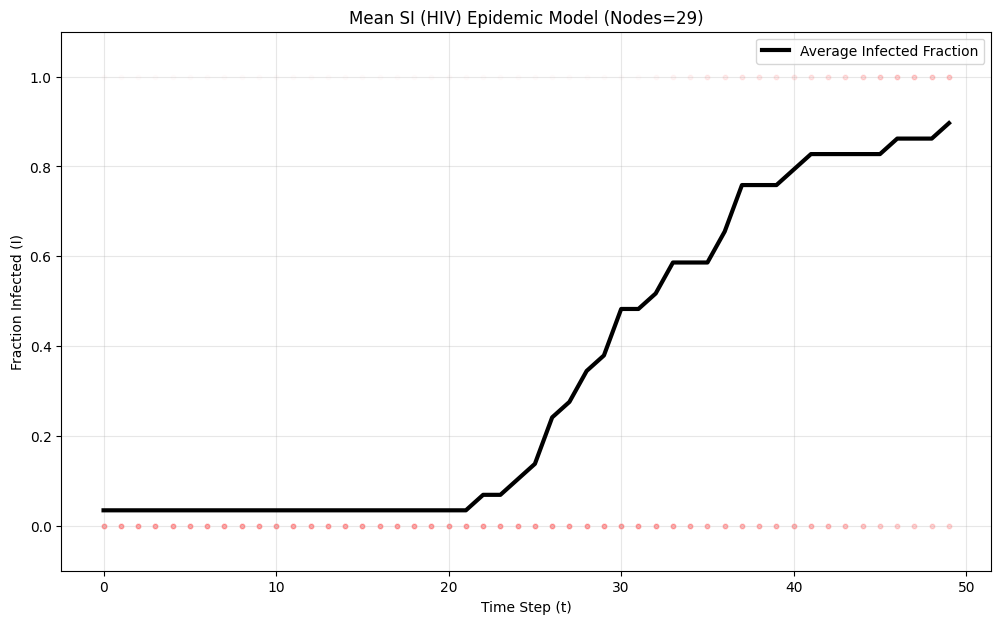

[0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.06896552 0.06896552
 0.10344828 0.13793103 0.24137931 0.27586207 0.34482759 0.37931034
 0.48275862 0.48275862 0.51724138 0.5862069  0.5862069  0.5862069
 0.65517241 0.75862069 0.75862069 0.75862069 0.79310345 0.82758621
 0.82758621 0.82758621 0.82758621 0.82758621 0.86206897 0.86206897
 0.86206897 0.89655172]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import polars as pl

def SI_sim_random_nodes_removed(T, G, beta):
    average_I = []

    for trial in range(2):


        removed_nodes = np.random.choice(G.number_of_nodes(), 5, replace=False)

        remaining_nodes = list(set(range(G.number_of_nodes())) - set(removed_nodes))

    #make graph
        G_sub = G.subgraph(remaining_nodes).copy() 


        A = nx.to_numpy_array(G_sub)


        initial_case = np.random.randint(G_sub.number_of_nodes())


    #Define initial populations
        S0 = np.ones(G_sub.number_of_nodes()) 
        S0[initial_case] = 0 # Making one individual infected
        I0 = np.zeros(G_sub.number_of_nodes())
        I0[initial_case] = 1

    #Store them
        S = [S0]
        I = [I0]

    #Loop over time rangei
        for t in range(T-1):
        #Use the equations to create array of probabilities of becoming infected
        
            prob_array = (A @ I[t] * beta * S[t])

        #Initialize an array of zeros to store the new infected population
            I_new = np.zeros(G_sub.number_of_nodes())
        #Loop over number of individuals
            for i in range(G_sub.number_of_nodes()):
            #
                if I[t][i] == 0:
                    I_new[i] = (np.random.rand() < prob_array[i])
                else:
                    I_new[i] = 1

        # Storing values
            S.append(1-I_new)
            I.append(I_new)

    average_I.append([j.mean() for j in I])
    average_I = np.array(average_I)
    return average_I


T = 50
G = nx.karate_club_graph()
beta = 0.01

average_I = []

for trial in range(2):


    removed_nodes = np.random.choice(G.number_of_nodes(), 5, replace=False)

    remaining_nodes = list(set(range(G.number_of_nodes())) - set(removed_nodes))

#make graph
    G_sub = G.subgraph(remaining_nodes).copy() 


    A = nx.to_numpy_array(G_sub)


    initial_case = np.random.randint(G_sub.number_of_nodes())


#Define initial populations
    S0 = np.ones(G_sub.number_of_nodes()) 
    S0[initial_case] = 0 # Making one individual infected
    I0 = np.zeros(G_sub.number_of_nodes())
    I0[initial_case] = 1

#Store them
    S = [S0]
    I = [I0]

#Loop over time rangei
    for t in range(T-1):
    #Use the equations to create array of probabilities of becoming infected
    
        prob_array = (A @ I[t] * beta * S[t])

    #Initialize an array of zeros to store the new infected population
        I_new = np.zeros(G_sub.number_of_nodes())
    #Loop over number of individuals
        for i in range(G_sub.number_of_nodes()):
        #
            if I[t][i] == 0:
                I_new[i] = (np.random.rand() < prob_array[i])
            else:
                I_new[i] = 1

    # Storing values
        S.append(1-I_new)
        I.append(I_new)

average_I.append([j.mean() for j in I])
average_I = np.array(average_I)



plt.figure(figsize=(12, 7))

# 1. Scatter plot for individual node states over time
# Note: Since I_history is large (1000 time steps), the alpha=0.01 makes it an
# intensity plot, showing the overall trend of node states.
for i in range(T):
    plt.scatter(i * np.ones(I_history[i].shape), I_history[i], 
                color = 'red', s = 10, alpha = 0.01)

# 2. Line plot for the average infected fraction
plt.plot(range(T), average_I.mean(axis=0) , 'k-', linewidth = 3, label='Average Infected Fraction')

plt.title(f'Mean SI (HIV) Epidemic Model (Nodes={G_sub.number_of_nodes()})')
plt.xlabel('Time Step (t)')
plt.ylabel('Fraction Infected (I)')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show() # Necessary command to display the plot



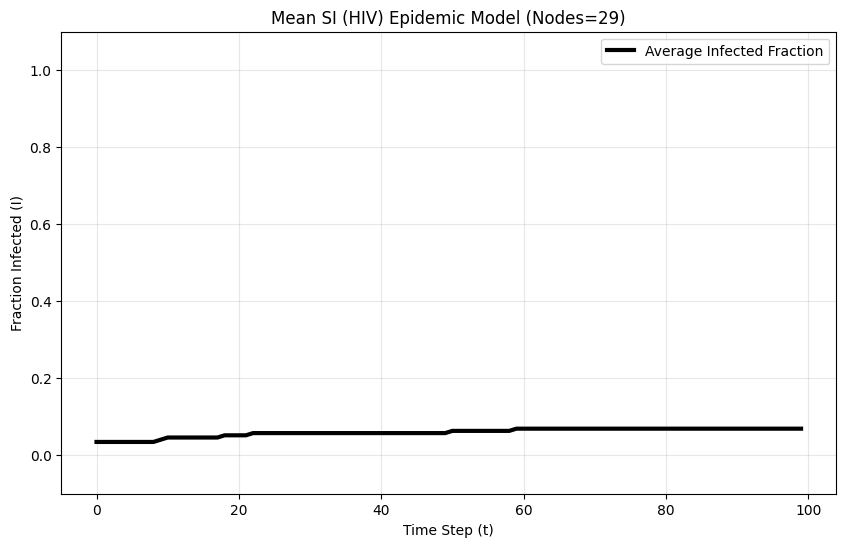

array([0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.04022989,
       0.04597701, 0.04597701, 0.04597701, 0.04597701, 0.04597701,
       0.04597701, 0.04597701, 0.04597701, 0.05172414, 0.05172414,
       0.05172414, 0.05172414, 0.05747126, 0.05747126, 0.05747126,
       0.05747126, 0.05747126, 0.05747126, 0.05747126, 0.05747126,
       0.05747126, 0.05747126, 0.05747126, 0.05747126, 0.05747126,
       0.05747126, 0.05747126, 0.05747126, 0.05747126, 0.05747126,
       0.05747126, 0.05747126, 0.05747126, 0.05747126, 0.05747126,
       0.05747126, 0.05747126, 0.05747126, 0.05747126, 0.05747126,
       0.06321839, 0.06321839, 0.06321839, 0.06321839, 0.06321839,
       0.06321839, 0.06321839, 0.06321839, 0.06321839, 0.06896552,
       0.06896552, 0.06896552, 0.06896552, 0.06896552, 0.06896552,
       0.06896552, 0.06896552, 0.06896552, 0.06896552, 0.06896552,
       0.06896552, 0.06896552, 0.06896552, 0.06896552, 0.06896

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import polars as pl

def SI_sim_top_nodes_removed(T, G, beta, runs):
    average_I = []

    for trial in range(runs):

        degree_tuples = list(G.degree())

        nodes_by_degree = sorted(degree_tuples, key=lambda x: x[1], reverse=True)

        removed_nodes = [node for node, degree in nodes_by_degree[:5]]
        

    #make graph
        G_sub = G.subgraph(remaining_nodes).copy() 


        A = nx.to_numpy_array(G_sub)


        initial_case = np.random.randint(G_sub.number_of_nodes())


    #Define initial populations
        S0 = np.ones(G_sub.number_of_nodes()) 
        S0[initial_case] = 0 # Making one individual infected
        I0 = np.zeros(G_sub.number_of_nodes())
        I0[initial_case] = 1

    #Store them
        S = [S0]
        I = [I0]

    #Loop over time rangei
        for t in range(T-1):
        #Use the equations to create array of probabilities of becoming infected
        
            prob_array = (A @ I[t] * beta * S[t])

        #Initialize an array of zeros to store the new infected population
            I_new = np.zeros(G_sub.number_of_nodes())
        #Loop over number of individuals
            for i in range(G_sub.number_of_nodes()):
            #
                if I[t][i] == 0:
                    I_new[i] = (np.random.rand() < prob_array[i])
                else:
                    I_new[i] = 1

        # Storing values
            S.append(1-I_new)
            I.append(I_new)

        average_I.append([j.mean() for j in I])
    average_I = np.array(average_I)
    
    plt.figure(figsize=(10, 6))

    average_curve = average_I.mean(axis=0)

#Line plot for the average infected fraction
    plt.plot(range(T), average_curve , 'k-', linewidth = 3, label='Average Infected Fraction')

    plt.title(f'Mean SI (HIV) Epidemic Model (Nodes={G_sub.number_of_nodes()})')
    plt.xlabel('Time Step (t)')
    plt.ylabel('Fraction Infected (I)')
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show() 



    return average_curve


SI_sim_top_nodes_removed(100, nx.karate_club_graph(), 0.01, 6)

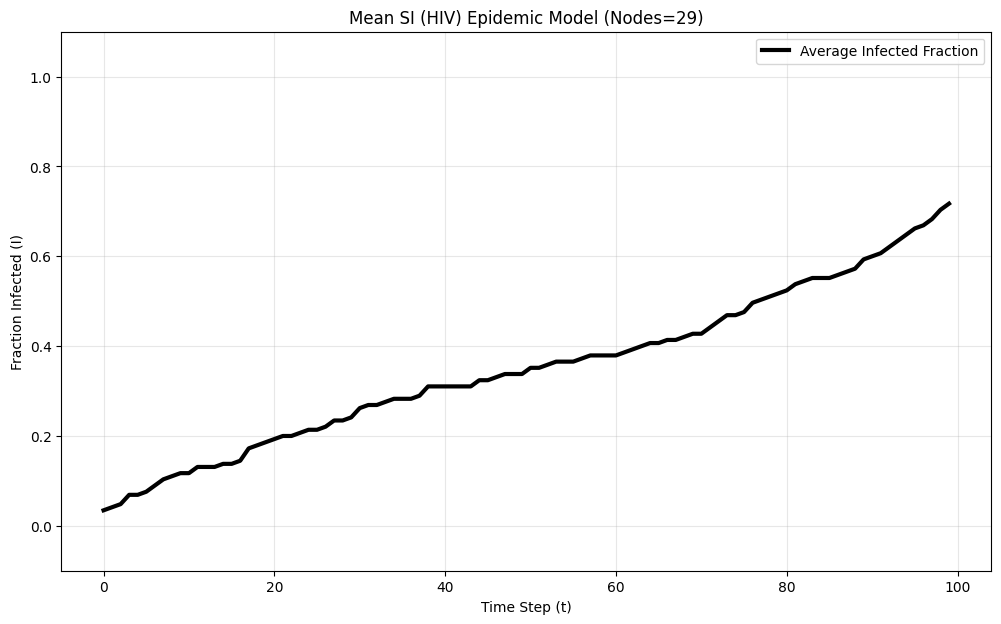

array([0.03448276, 0.04137931, 0.04827586, 0.06896552, 0.06896552,
       0.07586207, 0.08965517, 0.10344828, 0.11034483, 0.11724138,
       0.11724138, 0.13103448, 0.13103448, 0.13103448, 0.13793103,
       0.13793103, 0.14482759, 0.17241379, 0.17931034, 0.1862069 ,
       0.19310345, 0.2       , 0.2       , 0.20689655, 0.2137931 ,
       0.2137931 , 0.22068966, 0.23448276, 0.23448276, 0.24137931,
       0.26206897, 0.26896552, 0.26896552, 0.27586207, 0.28275862,
       0.28275862, 0.28275862, 0.28965517, 0.31034483, 0.31034483,
       0.31034483, 0.31034483, 0.31034483, 0.31034483, 0.32413793,
       0.32413793, 0.33103448, 0.33793103, 0.33793103, 0.33793103,
       0.35172414, 0.35172414, 0.35862069, 0.36551724, 0.36551724,
       0.36551724, 0.37241379, 0.37931034, 0.37931034, 0.37931034,
       0.37931034, 0.3862069 , 0.39310345, 0.4       , 0.40689655,
       0.40689655, 0.4137931 , 0.4137931 , 0.42068966, 0.42758621,
       0.42758621, 0.44137931, 0.45517241, 0.46896552, 0.46896

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import polars as pl

def SI_sim_random_nodes_removed(T, G, beta, runs):
    average_I = []

    for trial in range(runs):


        removed_nodes = np.random.choice(G.number_of_nodes(), 5, replace=False)

        remaining_nodes = list(set(range(G.number_of_nodes())) - set(removed_nodes))

    #make graph
        G_sub = G.subgraph(remaining_nodes).copy() 


        A = nx.to_numpy_array(G_sub)


        initial_case = np.random.randint(G_sub.number_of_nodes())


    #Define initial populations
        S0 = np.ones(G_sub.number_of_nodes()) 
        S0[initial_case] = 0 # Making one individual infected
        I0 = np.zeros(G_sub.number_of_nodes())
        I0[initial_case] = 1

    #Store them
        S = [S0]
        I = [I0]

    #Loop over time rangei
        for t in range(T-1):
        #Use the equations to create array of probabilities of becoming infected
        
            prob_array = (A @ I[t] * beta * S[t])

        #Initialize an array of zeros to store the new infected population
            I_new = np.zeros(G_sub.number_of_nodes())
        #Loop over number of individuals
            for i in range(G_sub.number_of_nodes()):
            #
                if I[t][i] == 0:
                    I_new[i] = (np.random.rand() < prob_array[i])
                else:
                    I_new[i] = 1

        # Storing values
            S.append(1-I_new)
            I.append(I_new)

        average_I.append([j.mean() for j in I])
    average_I = np.array(average_I)
    
    plt.figure(figsize=(10, 6))

    average_curve = average_I.mean(axis=0)

#Line plot for the average infected fraction
    plt.plot(range(T), average_curve , 'k-', linewidth = 3, label='Average Infected Fraction')

    plt.title(f'Mean SI (HIV) Epidemic Model (Nodes={G_sub.number_of_nodes()})')
    plt.xlabel('Time Step (t)')
    plt.ylabel('Fraction Infected (I)')
    plt.ylim(-0.1, 1.1)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show() 



    return average_curve


SI_sim_random_nodes_removed(100, nx.karate_club_graph(), 0.01, 5)


